In [2]:
import pandas as pd
import numpy as np
np.random.seed(42)
import random
random.seed(42)
from project1 import defs

dim_reduced_train_features: pd.DataFrame = defs.load_asset_value("dim_reduced_train_features")
train_root_labels: pd.DataFrame = defs.load_asset_value("train_root_labels")
dim_reduced_test_features: pd.DataFrame = defs.load_asset_value("dim_reduced_test_features")
test_root_labels: pd.DataFrame = defs.load_asset_value("test_root_labels")

2024-04-09 10:29:30 -0700 - dagster - DEBUG - system - Loading file from: /home/maguire/ucla/ece219/project1/project1/../data/dim_reduced_train_features using PickledObjectFilesystemIOManager...
2024-04-09 10:29:30 -0700 - dagster - DEBUG - system - Loading file from: /home/maguire/ucla/ece219/project1/project1/../data/train_root_labels using PickledObjectFilesystemIOManager...
2024-04-09 10:29:31 -0700 - dagster - DEBUG - system - Loading file from: /home/maguire/ucla/ece219/project1/project1/../data/dim_reduced_test_features using PickledObjectFilesystemIOManager...
2024-04-09 10:29:31 -0700 - dagster - DEBUG - system - Loading file from: /home/maguire/ucla/ece219/project1/project1/../data/test_root_labels using PickledObjectFilesystemIOManager...


In [3]:
from sklearn.svm import SVC

svm_hard_1000 = SVC(C=1000, probability=True)
svm_hard_100000 = SVC(C=100000, probability=True)
svm_soft_0001 = SVC(C=0.0001, probability=True)

In [4]:
svm_hard_1000.fit(dim_reduced_train_features, train_root_labels)
svm_hard_100000.fit(dim_reduced_train_features, train_root_labels)
svm_soft_0001.fit(dim_reduced_train_features, train_root_labels)

SVC(C=0.0001, probability=True)

In [5]:
from project1.utils.MetricsAnalyzer import MetricsAnalyzer

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC plot: 


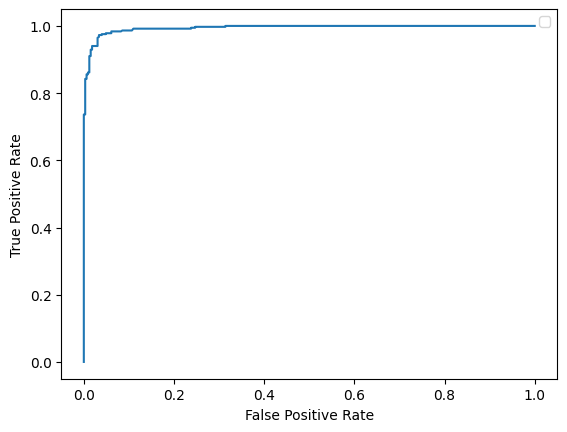

Confusion Matrix: 
[[317  11]
 [ 12 356]]
Accuracy Score: 
0.9669540229885057
Recall Score: 
0.967391304347826
Precision Score: 
0.9700272479564033
F1 Score: 
0.9687074829931973


In [6]:
g1000_test_metrics = MetricsAnalyzer(svm_hard_1000, dim_reduced_test_features, test_root_labels, pos_label="sports")
g1000_test_metrics.print_all()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC plot: 


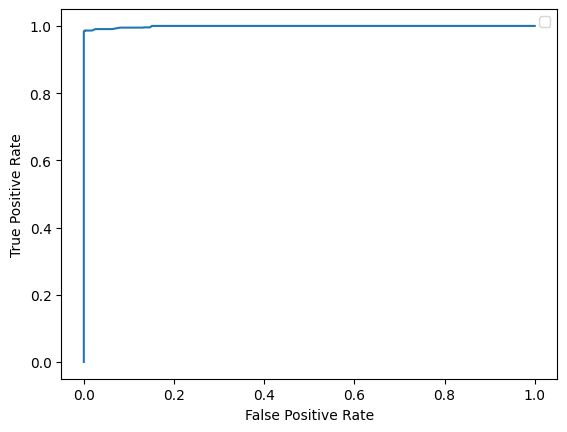

Confusion Matrix: 
[[1396    2]
 [  20 1362]]
Accuracy Score: 
0.9920863309352518
Recall Score: 
0.9855282199710564
Precision Score: 
0.998533724340176
F1 Score: 
0.9919883466860888


In [7]:
g1000_train_metrics = MetricsAnalyzer(svm_hard_1000, dim_reduced_train_features, train_root_labels, pos_label="sports")
g1000_train_metrics.print_all()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC plot: 


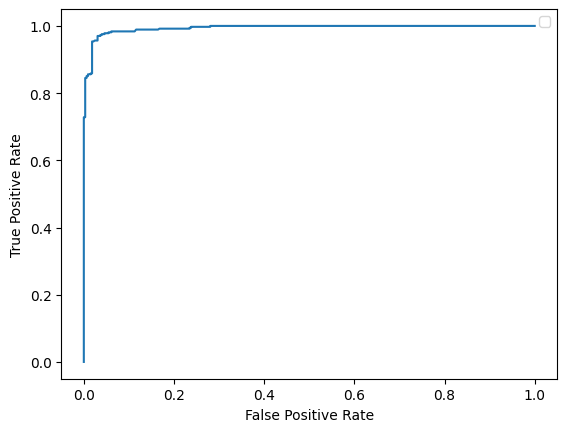

Confusion Matrix: 
[[318  10]
 [ 13 355]]
Accuracy Score: 
0.9669540229885057
Recall Score: 
0.9646739130434783
Precision Score: 
0.9726027397260274
F1 Score: 
0.9686221009549796


In [8]:
g100000_test_metrics = MetricsAnalyzer(svm_hard_100000, dim_reduced_test_features, test_root_labels, pos_label="sports")
g100000_test_metrics.print_all()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC plot: 


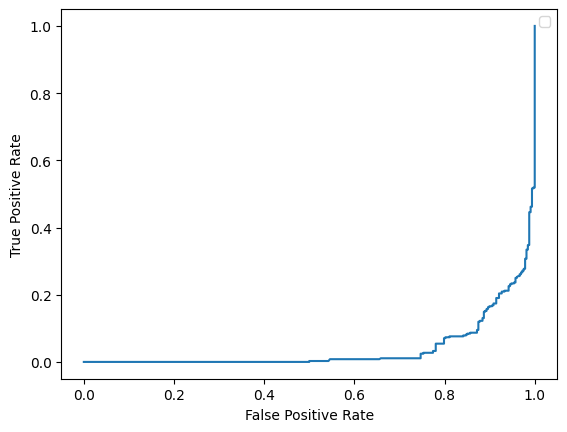

Confusion Matrix: 
[[328   0]
 [368   0]]
Accuracy Score: 
0.47126436781609193
Recall Score: 
0.0
Precision Score: 
0.0
F1 Score: 
0.0


/home/maguire/ucla/ece219/project1/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
g0001_test_metrics = MetricsAnalyzer(svm_soft_0001, dim_reduced_test_features, test_root_labels, pos_label="sports")
g0001_test_metrics.print_all()

In [11]:
from sklearn.model_selection import GridSearchCV

grid = {
    "C": [10 ** k for k in range(-3, 7)]
}

clf = GridSearchCV(SVC(probability=True), grid, scoring="accuracy", cv=5, n_jobs=2)
clf.fit(dim_reduced_train_features, train_root_labels)

GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=2,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000,
                               100000, 1000000]},
             scoring='accuracy')

In [12]:
clf.best_estimator_

SVC(C=10, probability=True)

In [18]:
clf.best_score_

0.958273381294964

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ROC plot: 


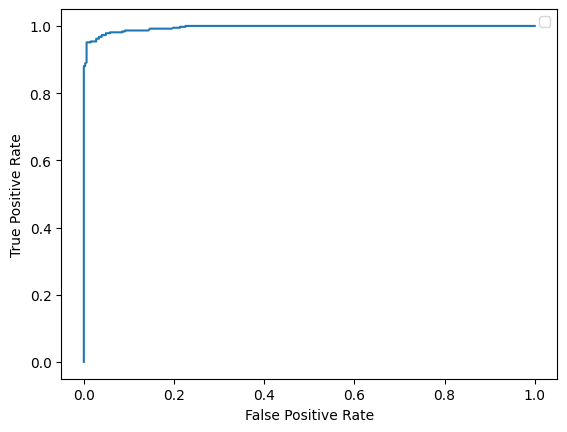

Confusion Matrix: 
[[317  11]
 [ 13 355]]
Accuracy Score: 
0.9655172413793104
Recall Score: 
0.9646739130434783
Precision Score: 
0.9699453551912568
F1 Score: 
0.9673024523160763


In [17]:
best_test_metrics = MetricsAnalyzer(clf, dim_reduced_test_features, test_root_labels, pos_label="sports")
best_test_metrics.print_all()